# 2021/10/18
# 本代码绘制逐侯的地面风，使用资料为erain
# 目的是为了验证吴老师的结果，我自己算的风向角总是只能到15°N

In [1]:
import os
import sys
import xarray as xr
import numpy as np
module_path = ["/home/sun/mycode/module/","/data5/2019swh/mycode/module/"]
sys.path.append(module_path[0])
from module_sun import *
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from metpy.units import units
from matplotlib.path import Path
import matplotlib.patches as patches

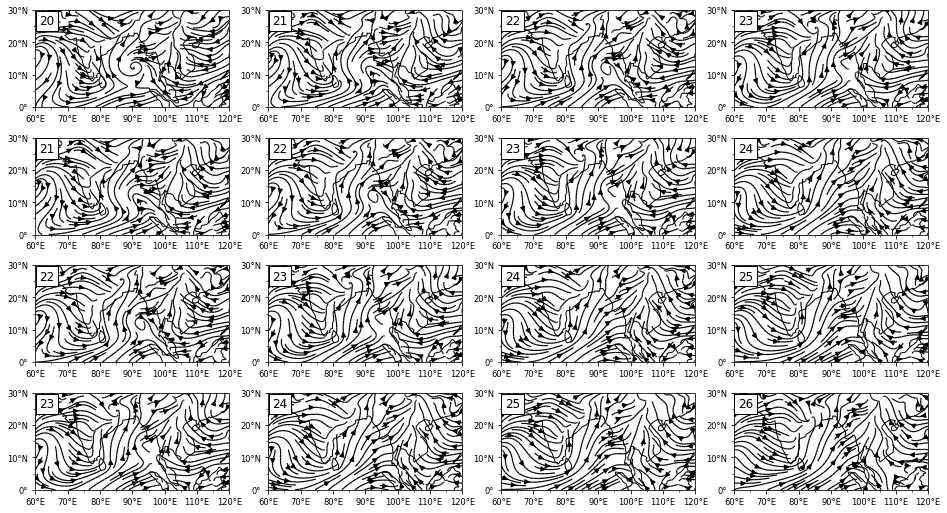

In [2]:
lat_slice   =   slice(-10,30)
lon_slice   =   slice(30,120)

lonmin,lonmax,latmin,latmax  =  60,120,0,30
extent     =  [lonmin,lonmax,latmin,latmax]
props = dict(boxstyle='square', facecolor='white', alpha=1)

wind_era  =  xr.open_dataset("/home/sun/data/merra2_u2v2_climate.nc").sel(lat=lat_slice,lon=lon_slice)
u_pentad  =  np.zeros((73,wind_era.u2_climate.data.shape[1],wind_era.u2_climate.data.shape[2]))
v_pentad  =  u_pentad.copy()
for p in range(0,73):
    u_pentad[p,:]  =  np.average(wind_era.u2_climate.data[p*5:p*5+5,:],axis=0)
    v_pentad[p,:]  =  np.average(wind_era.v2_climate.data[p*5:p*5+5,:],axis=0)

proj    =  ccrs.PlateCarree()
fig1    =  plt.figure(figsize=(16,9)) ; fig1.tight_layout()
spec1   =  fig1.add_gridspec(nrows=4,ncols=4)

i = 0
for row in range(0,4):
    for col in range(0,4):
        ax = fig1.add_subplot(spec1[row,col],projection=proj)
        ax.coastlines(resolution='110m',lw=1)
        # 设置经纬度刻度.
        set_map_ticks(ax, dx=10, dy=10, nx=1, ny=1, labelsize='small')
        ax.set_extent(extent, crs=proj)

        ax.streamplot(wind_era.lon.data, wind_era.lat.data, 
                      u_pentad[(20+row+col),:], v_pentad[(20+row+col),:], 
                      color='k',linewidth=1.2,
                     density=1)
        ax.text(0.02,0.85,str(20+row+col),transform=ax.transAxes,bbox=props,fontsize=12)


In [3]:
u_pentad.shape

(73, 81, 145)